In [11]:
import numpy
import re

In [12]:
with open('sentences.txt', 'r') as f:
    sentences = f.read()
sentences2 = sentences.lower()
arr = sentences.lower().split('\n')
arr_f = arr
arr

['in comparison to dogs, cats have not undergone major changes during the domestication process.',
 'as cat simply catenates streams of bytes, it can be also used to concatenate binary files, where it will just concatenate sequence of bytes.',
 'a common interactive use of cat for a single file is to output the content of a file to standard output.',
 'cats can hear sounds too faint or too high in frequency for human ears, such as those made by mice and other small animals.',
 'in one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.',
 'the domesticated cat and its closest wild ancestor are both diploid organisms that possess 38 chromosomes and roughly 20,000 genes.',
 'domestic cats are similar in size to the other members of the genus felis, typically weighing between 4 and 5 kg (8.8 and 11.0 lb).',
 'however, if the output is piped or redirected, cat is unnecessary.',
 'cat with one named file is safer where human error i

In [13]:
for i in range(len(arr)):                               
    arr[i] = re.split('[^a-z]', arr[i])    
    for j in range(arr[i].count('')):        
        arr[i].remove('')
arr

[['in',
  'comparison',
  'to',
  'dogs',
  'cats',
  'have',
  'not',
  'undergone',
  'major',
  'changes',
  'during',
  'the',
  'domestication',
  'process'],
 ['as',
  'cat',
  'simply',
  'catenates',
  'streams',
  'of',
  'bytes',
  'it',
  'can',
  'be',
  'also',
  'used',
  'to',
  'concatenate',
  'binary',
  'files',
  'where',
  'it',
  'will',
  'just',
  'concatenate',
  'sequence',
  'of',
  'bytes'],
 ['a',
  'common',
  'interactive',
  'use',
  'of',
  'cat',
  'for',
  'a',
  'single',
  'file',
  'is',
  'to',
  'output',
  'the',
  'content',
  'of',
  'a',
  'file',
  'to',
  'standard',
  'output'],
 ['cats',
  'can',
  'hear',
  'sounds',
  'too',
  'faint',
  'or',
  'too',
  'high',
  'in',
  'frequency',
  'for',
  'human',
  'ears',
  'such',
  'as',
  'those',
  'made',
  'by',
  'mice',
  'and',
  'other',
  'small',
  'animals'],
 ['in',
  'one',
  'people',
  'deliberately',
  'tamed',
  'cats',
  'in',
  'a',
  'process',
  'of',
  'artificial',
  's

In [14]:
unique = list(set([word for arr_f in arr for word in arr_f]))
d={}
cnt = 0
for i in unique:                       
    d[i] = cnt
    cnt +=1
d

{'default': 0,
 'other': 1,
 'tiger': 2,
 'fifth': 3,
 'displays': 4,
 'use': 5,
 'predators': 6,
 'keyboards': 7,
 'basic': 8,
 'concern': 9,
 'frequency': 10,
 'one': 11,
 'leopard': 12,
 'two': 13,
 'factory': 14,
 'for': 15,
 'instead': 16,
 'that': 17,
 'selection': 18,
 'single': 19,
 'world': 20,
 'or': 21,
 'october': 22,
 'undergone': 23,
 'human': 24,
 'learned': 25,
 'incremental': 26,
 'count': 27,
 'changes': 28,
 'time': 29,
 'an': 30,
 'their': 31,
 'during': 32,
 'between': 33,
 'firmware': 34,
 'such': 35,
 'switch': 36,
 'drive': 37,
 'dogs': 38,
 'binary': 39,
 'content': 40,
 'redirection': 41,
 'symbol': 42,
 'according': 43,
 'non': 44,
 'mavericks': 45,
 'safari': 46,
 'now': 47,
 'processors': 48,
 'concatenate': 49,
 'closest': 50,
 'too': 51,
 'vermin': 52,
 'purchase': 53,
 'receives': 54,
 'be': 55,
 'editions': 56,
 'kg': 57,
 'no': 58,
 'through': 59,
 'members': 60,
 'later': 61,
 'type': 62,
 'terms': 63,
 'process': 64,
 'available': 65,
 'files': 66,
 

In [15]:
matrix = numpy.zeros((len(arr_f), len(unique)))
for i, j in enumerate(arr):
    for z in j:
        matrix[i, d[z]] = j.count(z)
matrix.shape

(22, 254)

In [16]:
matrix

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [17]:
def cos_distance(x, y):
    return 1 - x@y/(numpy.sqrt(x@x)*numpy.sqrt(y@y))
distances=numpy.array([cos_distance(matrix[0],matrix[i]) for i in range(1, matrix.shape[0])])
distances

array([0.95275444, 0.86447381, 0.89517152, 0.77708871, 0.94023857,
       0.73273876, 0.92587507, 0.88427249, 0.90550888, 0.83281654,
       0.88047714, 0.83964325, 0.87035926, 0.87401184, 0.94427218,
       0.84063619, 0.9566445 , 0.94427218, 0.88854436, 0.84275727,
       0.82503645])

In [18]:
numpy.argsort(distances)[:2] + 1

array([6, 4], dtype=int64)

In [19]:
arr_f

[['in',
  'comparison',
  'to',
  'dogs',
  'cats',
  'have',
  'not',
  'undergone',
  'major',
  'changes',
  'during',
  'the',
  'domestication',
  'process'],
 ['as',
  'cat',
  'simply',
  'catenates',
  'streams',
  'of',
  'bytes',
  'it',
  'can',
  'be',
  'also',
  'used',
  'to',
  'concatenate',
  'binary',
  'files',
  'where',
  'it',
  'will',
  'just',
  'concatenate',
  'sequence',
  'of',
  'bytes'],
 ['a',
  'common',
  'interactive',
  'use',
  'of',
  'cat',
  'for',
  'a',
  'single',
  'file',
  'is',
  'to',
  'output',
  'the',
  'content',
  'of',
  'a',
  'file',
  'to',
  'standard',
  'output'],
 ['cats',
  'can',
  'hear',
  'sounds',
  'too',
  'faint',
  'or',
  'too',
  'high',
  'in',
  'frequency',
  'for',
  'human',
  'ears',
  'such',
  'as',
  'those',
  'made',
  'by',
  'mice',
  'and',
  'other',
  'small',
  'animals'],
 ['in',
  'one',
  'people',
  'deliberately',
  'tamed',
  'cats',
  'in',
  'a',
  'process',
  'of',
  'artificial',
  's

In [20]:
sentences2

'in comparison to dogs, cats have not undergone major changes during the domestication process.\nas cat simply catenates streams of bytes, it can be also used to concatenate binary files, where it will just concatenate sequence of bytes.\na common interactive use of cat for a single file is to output the content of a file to standard output.\ncats can hear sounds too faint or too high in frequency for human ears, such as those made by mice and other small animals.\nin one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.\nthe domesticated cat and its closest wild ancestor are both diploid organisms that possess 38 chromosomes and roughly 20,000 genes.\ndomestic cats are similar in size to the other members of the genus felis, typically weighing between 4 and 5 kg (8.8 and 11.0 lb).\nhowever, if the output is piped or redirected, cat is unnecessary.\ncat with one named file is safer where human error is a concern - one wrong u

In [30]:
d1={}
cnt = 0
for q in arr_f:
    for w in q:
        if not w in d1:
            d1[w] = 1
        else:
            d1[w] = d1[w] + 1
d1

{'in': 11,
 'comparison': 1,
 'to': 14,
 'dogs': 1,
 'cats': 4,
 'have': 2,
 'not': 1,
 'undergone': 1,
 'major': 2,
 'changes': 2,
 'during': 1,
 'the': 20,
 'domestication': 1,
 'process': 2,
 'as': 6,
 'cat': 10,
 'simply': 2,
 'catenates': 1,
 'streams': 1,
 'of': 19,
 'bytes': 2,
 'it': 4,
 'can': 3,
 'be': 3,
 'also': 2,
 'used': 1,
 'concatenate': 2,
 'binary': 1,
 'files': 1,
 'where': 2,
 'will': 2,
 'just': 3,
 'sequence': 2,
 'a': 13,
 'common': 1,
 'interactive': 1,
 'use': 2,
 'for': 4,
 'single': 1,
 'file': 5,
 'is': 7,
 'output': 3,
 'content': 2,
 'standard': 1,
 'hear': 1,
 'sounds': 1,
 'too': 2,
 'faint': 1,
 'or': 3,
 'high': 1,
 'frequency': 1,
 'human': 2,
 'ears': 1,
 'such': 2,
 'those': 1,
 'made': 1,
 'by': 3,
 'mice': 1,
 'and': 14,
 'other': 2,
 'small': 2,
 'animals': 1,
 'one': 4,
 'people': 1,
 'deliberately': 1,
 'tamed': 1,
 'artificial': 1,
 'selection': 1,
 'they': 1,
 'were': 2,
 'useful': 1,
 'predators': 1,
 'vermin': 1,
 'domesticated': 1,
 'its'

In [32]:
import matplotlib.pyplot as plt # pip install
from scipy.spatial import distance as dist  # pip install

NameError: name 'v' is not defined

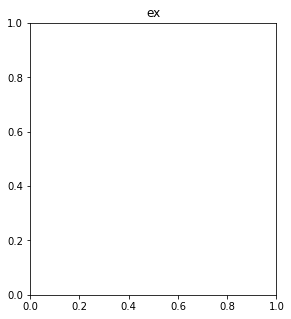

In [33]:
plt.figure(figsize=(15,5))
ax1 = plt.subplot(1,3,1)
ax1.set_title("ex")
ax1.hist(v[:,:,0].flatten())